In [74]:
from src.processing_data import processing_all_data
from matplotlib.lines import Line2D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
plt.style.use('properties.mplstyle')
import numpy as np
import matplotlib as mpl
mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],  # opcional
    "axes.unicode_minus": False,              # para "-" correto em LaTeX
})

In [2]:
# processing_data
processing_all_data("../../data")

[SKIP] Sem novos arquivos em: ../../data/N_8192/m0_2/dim_1/alpha_a_0.00_alpha_g_2.00/prop — nada a fazer.


In [4]:
df = pd.read_csv("../../data/all_data.csv", sep=',')
df

,N,m0,dim,alpha_a,alpha_g,N_samples,Short_Cost_mean,Short_Cost_error,Short_BFS_mean,Short_BFS_error,R_Spearman_mean,R_Spearman_error,R_Newman_mean,R_Newman_error,ClusterCoefficient_mean,ClusterCoefficient_error
0,8192,2,1,0.0,2.0,601,6.058509,0.01265,4.942359,0.001822,0.287127,0.000806,-0.047969,0.000601,0.00547,0.000039


## SHOREST PATH (DIJSTRIKA) -- $\alpha_A$

[4096, 8192, 16384, 32768, 65536, 131072]


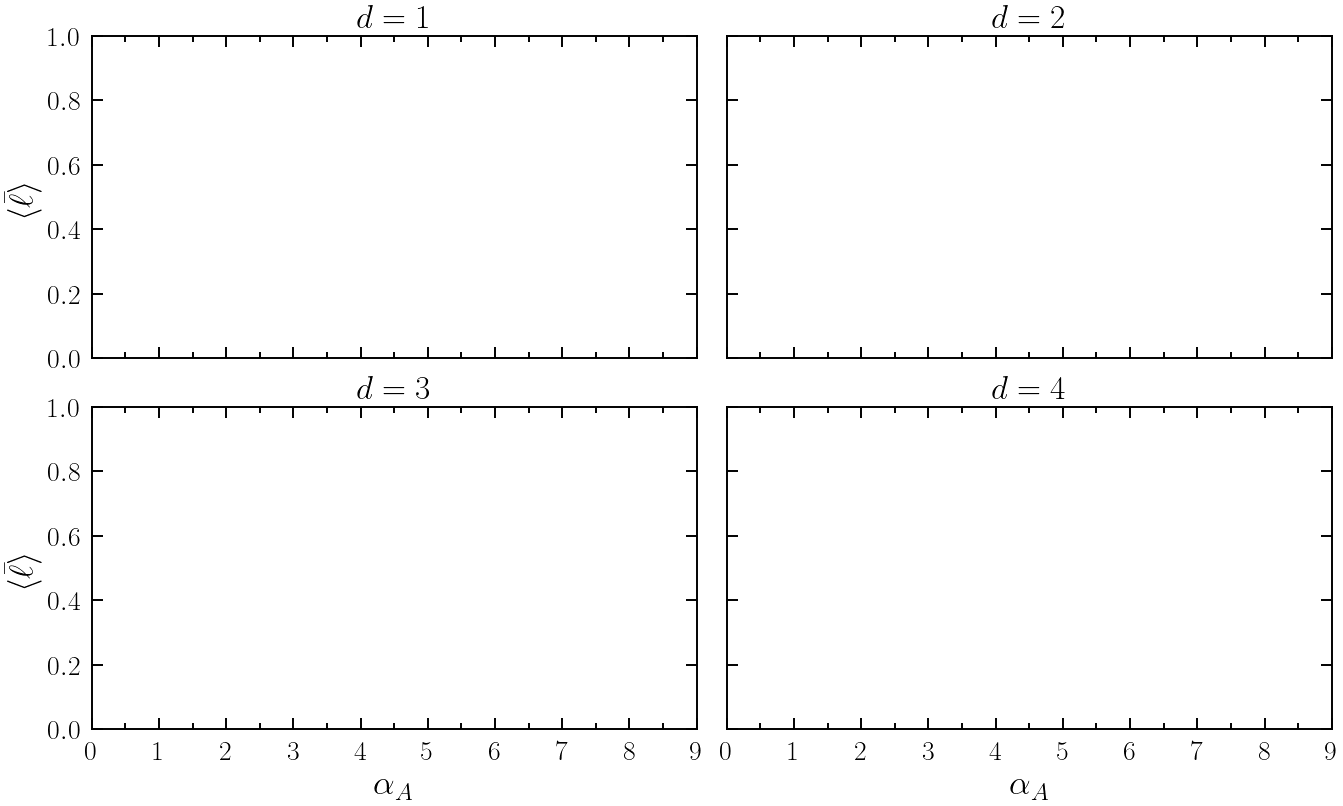

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
fs_ticks = 20
N = [2**i for i in range(12, 18)]
print(N)
dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                   length=4, width=thickness_axes, direction='in')

# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()


## SHOREST PATH (DIJSTRIKA) -- $\alpha_G$

[4096, 8192, 16384, 32768, 65536, 131072]


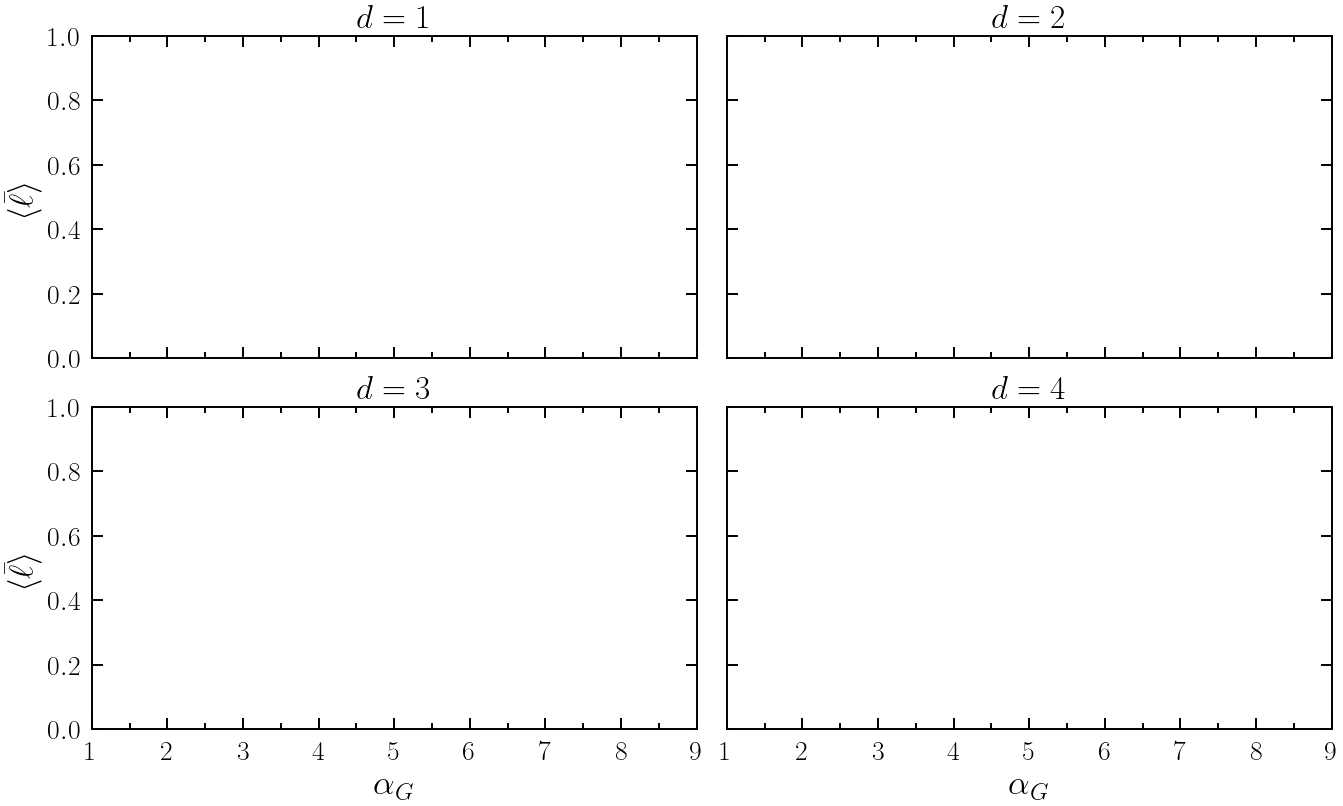

In [84]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25

N = [2**i for i in range(12, 18)]
print(N)
dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8
fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_A$

[4096, 8192, 16384, 32768, 65536, 131072]


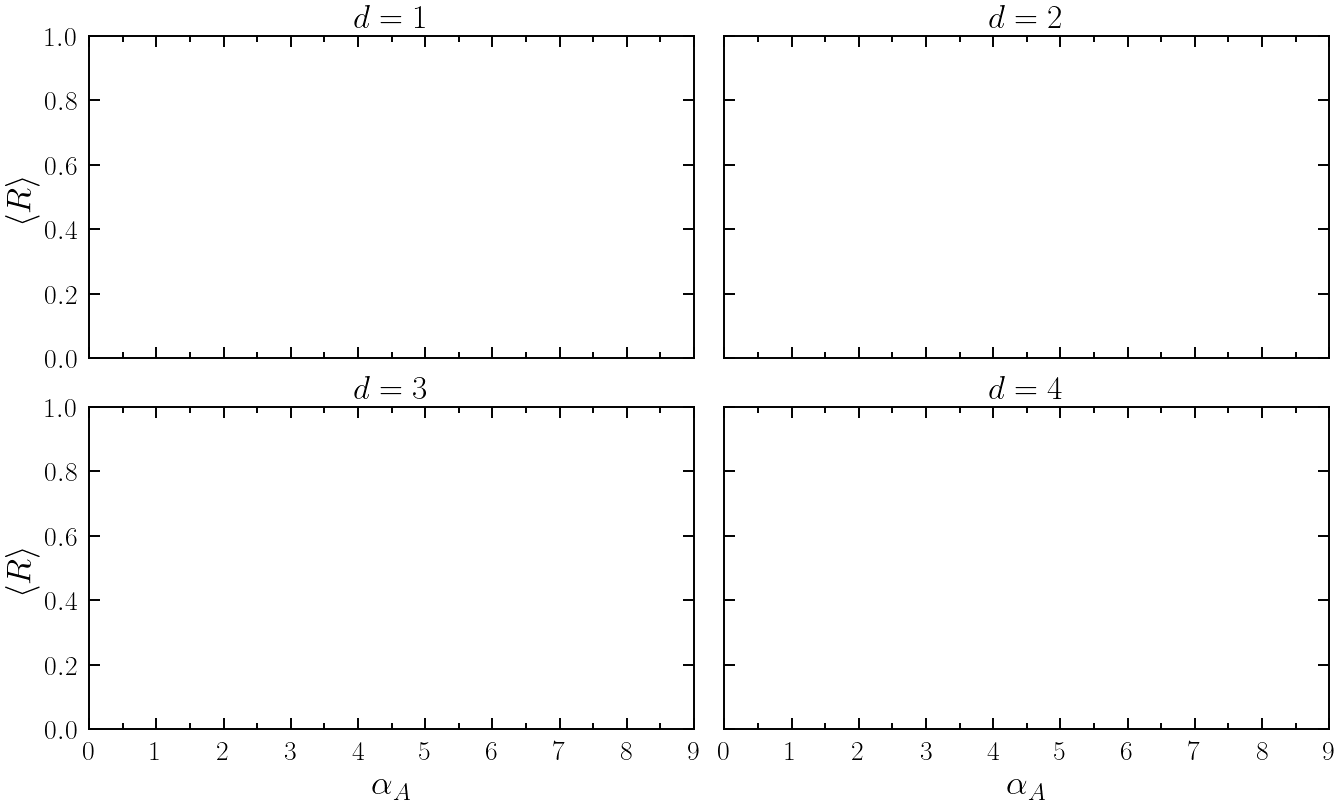

In [88]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25

N = [2**i for i in range(12, 18)]
print(N)
dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8

fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    ax.set_xlim(0, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_A$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()

## ASSORTATIVITY COEFFICIENT (SPEARMAN) -- $\alpha_G$

[4096, 8192, 16384, 32768, 65536, 131072]


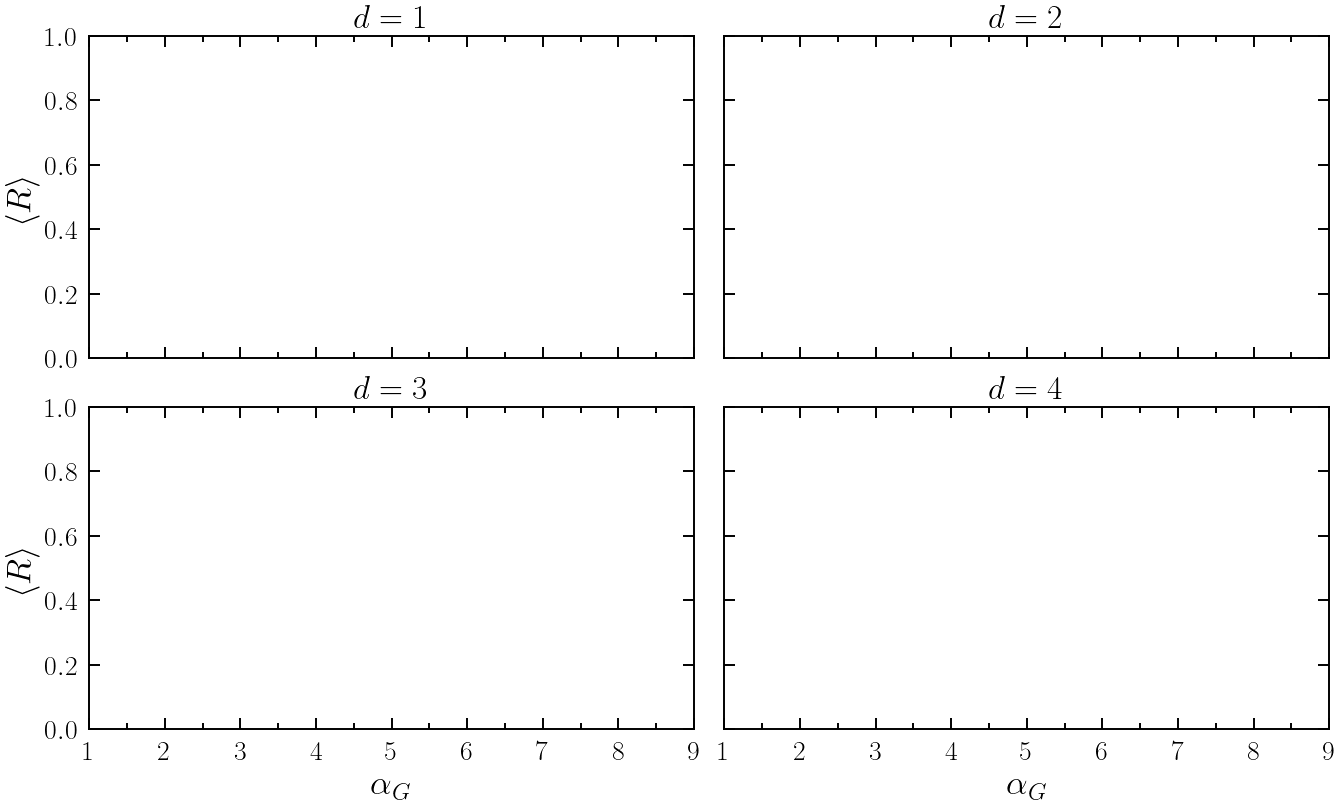

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(16,9))
plt.subplots_adjust(wspace=0.05, hspace=0.15)  # ↓ espaço horizontal/vertical
fs_labels = 25
N = []
N = [2**i for i in range(12, 18)]
print(N)
dim = [1,2,3,4]
labels = [f"$N = {n}$" for n in N]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
    ]

colors = ['#1f77b4', 
          '#ff7f0e', 
          '#2ca02c', 
          '#d62728', 
          '#9467bd',
          '#8c564b', 
          '#e377c2'
          ]

ls = [  'solid',
        'dotted',
        'dashed',
        'dashdot',
        (0,(3,5,1,5)),
        (0, (3,10,1,10)),
        (5,(10,3))
        ]


lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]

ms = 9
thickness_axes = 1.4
mew = 1.8
fs_ticks = 20

# Ticks de x em todos os gráficos
for idx, ax in enumerate(axes.ravel()):
    ax.set_xlim(1, 9)
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.5))
    ax.set_title(f"$d = {dim[idx]}$")
    
    ax.tick_params(axis='both', which='major',
                length=8, width=thickness_axes, direction='in', labelsize=fs_ticks)

    # Minor ticks: geralmente menores/mais finos
    ax.tick_params(axis='both', which='minor',
                    length=4, width=thickness_axes, direction='in')

# ---- Y: mostrar números só na 1ª coluna ----
# (mantém as “marquinhas” dos ticks em todas as colunas)
for ax in axes.ravel():
    ax.tick_params(axis='y', which='both', left=True)   # mostra ticks (marquinhas)

for ax in axes[:, 0]:                                   # 1ª coluna
    ax.set_ylabel(r"$\langle R \rangle$", fontsize=fs_labels)
    ax.tick_params(axis='y', which='both', labelleft=True)   # mostra números

for ax in axes[:, 1]:                                   # 2ª coluna
    ax.tick_params(axis='y', which='both', labelleft=False)  # esconde números

# ---- X: mostrar números só na linha de baixo ----
for ax in axes[0, :]:                                   # linha de cima
    ax.tick_params(axis='x', which='both', labelbottom=False)

for ax in axes[1, :]:                                   # linha de baixo
    ax.set_xlabel(r"$\alpha_G$", fontsize=fs_labels)
    ax.tick_params(axis='x', which='both', labelbottom=True)

fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))
plt.show()